In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
x = df.iloc[:,3:]

In [8]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


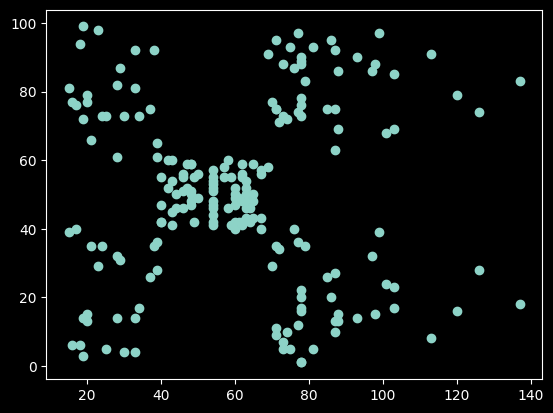

In [9]:
plt.style.use('dark_background')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [11]:
km.inertia_

106348.37306211119

In [12]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters= k)
    km.fit_predict(x)
    sse.append(km.inertia_)

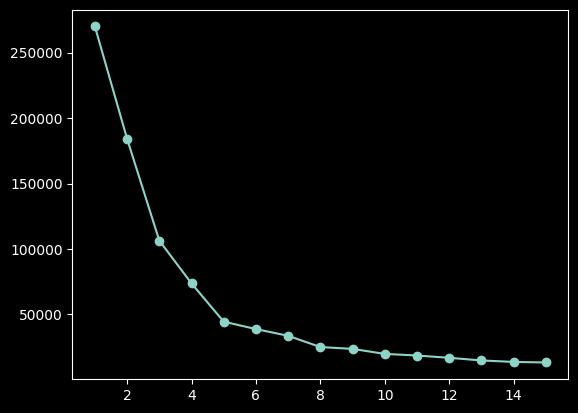

In [13]:
plt.plot(range(1,16),sse,marker = 'o')

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
sil =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    lab = km.fit_predict(x)
    score = silhouette_score(x,lab)
    sil.append(score)

In [16]:
sil

[np.float64(0.39564531743995546),
 np.float64(0.46761358158775435),
 np.float64(0.4937945814354117),
 np.float64(0.553931997444648),
 np.float64(0.5423120971494979),
 np.float64(0.5314247434775297),
 np.float64(0.4587710519424282),
 np.float64(0.4788395435070227),
 np.float64(0.4409007543586363),
 np.float64(0.4369931585467182),
 np.float64(0.4161631541258462),
 np.float64(0.42876068970195663),
 np.float64(0.41819791985767296),
 np.float64(0.4125784947960096)]

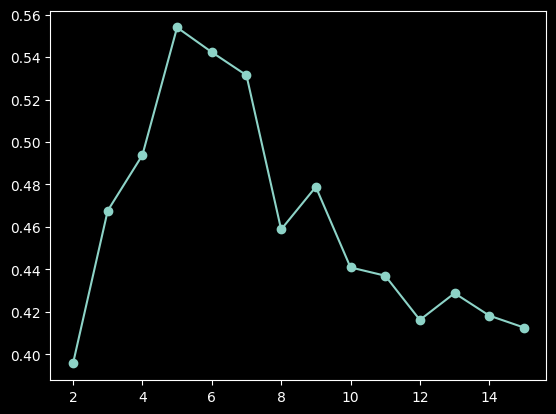

In [17]:
plt.plot(range(2,16),sil,marker = 'o')

<BarContainer object of 14 artists>

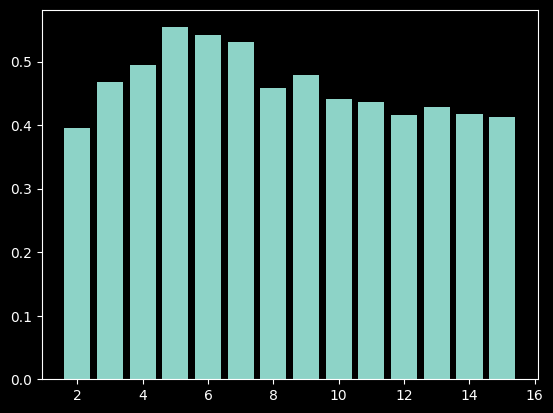

In [18]:
plt.bar(range(2,16),sil)

In [19]:
km = KMeans(n_clusters=5,random_state=0)
lab = km.fit_predict(x)
lab

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [20]:
cent = km.cluster_centers_

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
alg = AgglomerativeClustering(n_clusters=5)
alab = alg.fit_predict(x)
alab

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0.5, 1.0, 'K-Means')

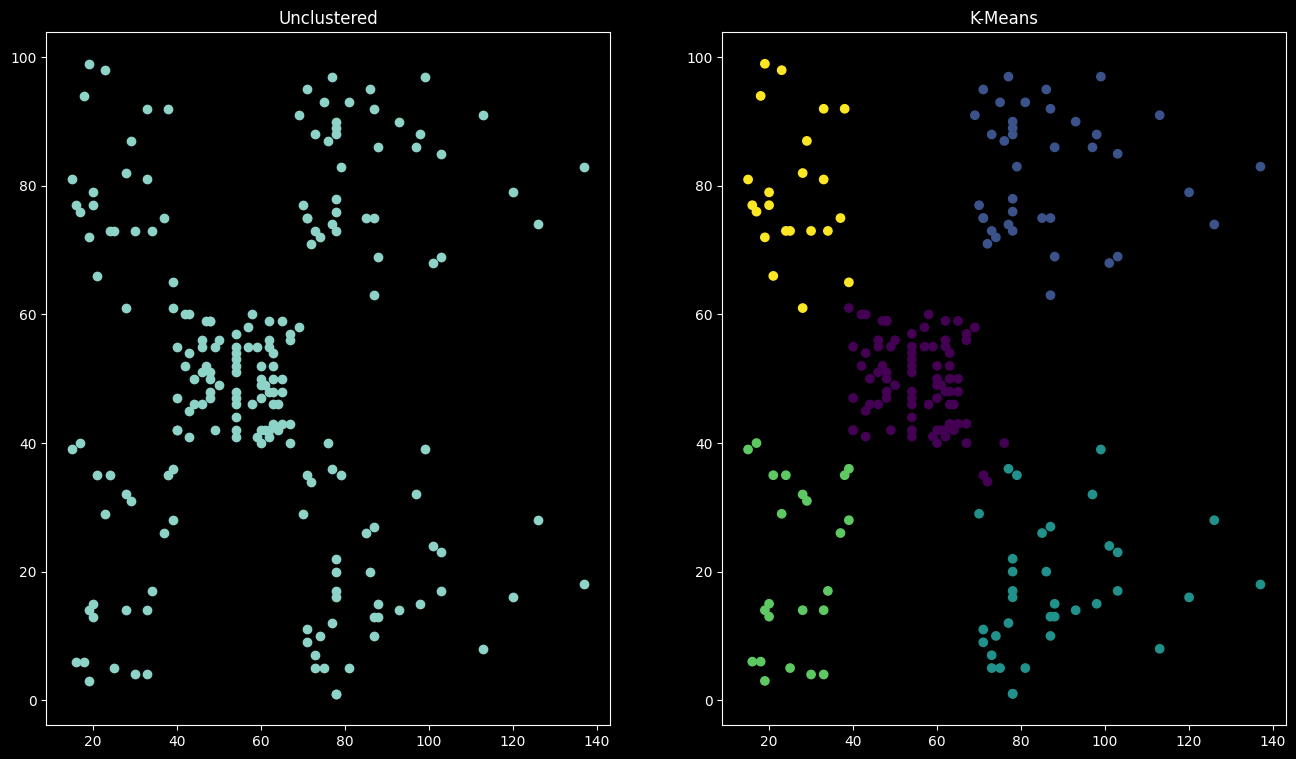

In [23]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"])
plt.title("Unclustered")

plt.subplot(1,2,2)
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"],c=lab)
plt.title("K-Means")



Text(0.5, 1.0, 'AgglomerativeClustering')

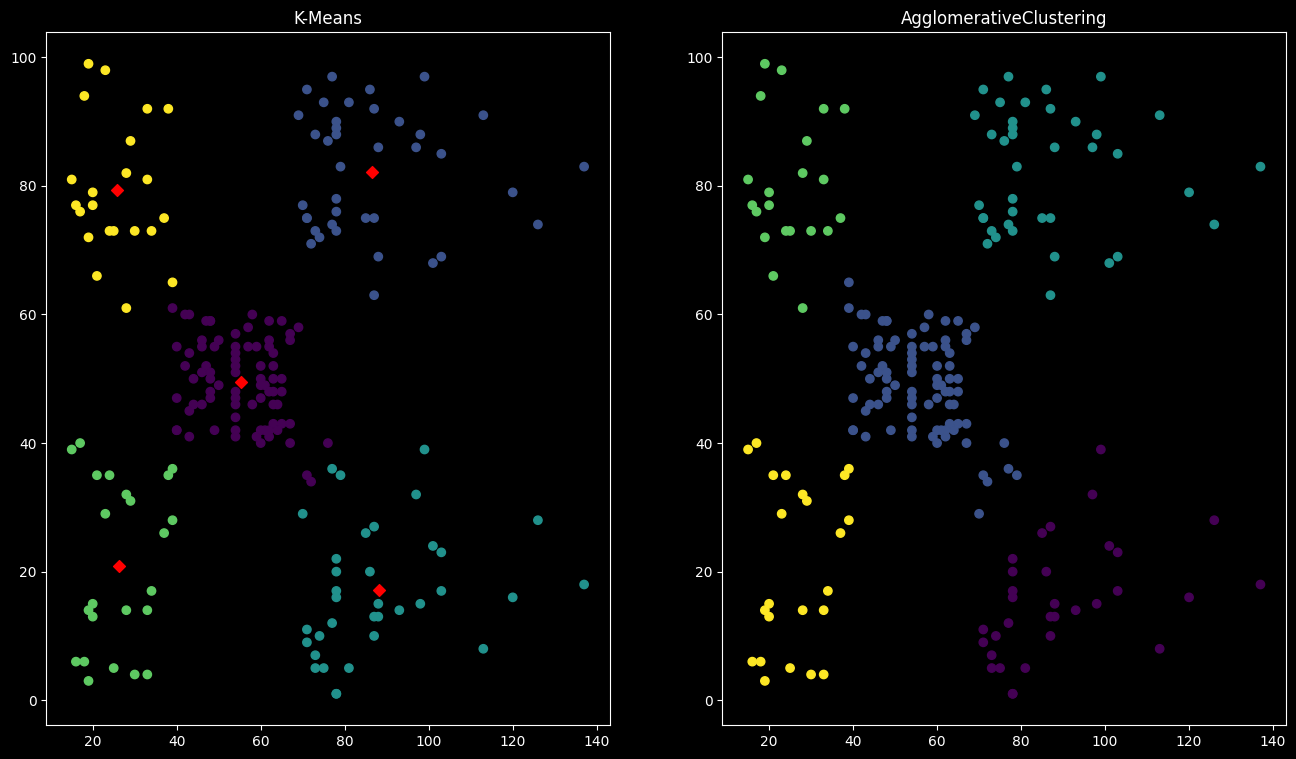

In [24]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"],c = lab)
plt.title("K-Means")
plt.scatter(cent[:,0],cent[:,1],color = 'red',marker = 'D')

plt.subplot(1,2,2)
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"],c=alab)
plt.title("AgglomerativeClustering")